In [1]:
! git clone https://github.com/dralmadani/MachineLearning

Cloning into 'MachineLearning'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 23 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

#to imprve Machine learning models
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
#ONLY CHOSE BEST PERFORMING MODELS from previous analysis
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [12]:
#%% Import dataset

Cardio_Profile = loadmat('/Users/winnie/Desktop/ML_PPT/Cardiovascular_Disease/cadio_filter.mat')
Cardio_raw = Cardio_Profile['cardiotrain']
# split triandata:x and result:
x = Cardio_raw [:,1:11]
y = Cardio_raw [:,12]

In [14]:
#%% Split data 
# use random_state to make a fixed train and test dataset
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=555)


In [15]:

models = {
   

    "LogisticRegression": LogisticRegression(random_state=10),
    "RandomForestClassifier": RandomForestClassifier(random_state=10),
    "SVC": svm.SVC(kernel="linear",random_state=10),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=10)
    
}

prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train,y_train)
    prediction[model_name] = model.predict(x_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score

In [16]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

In [17]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

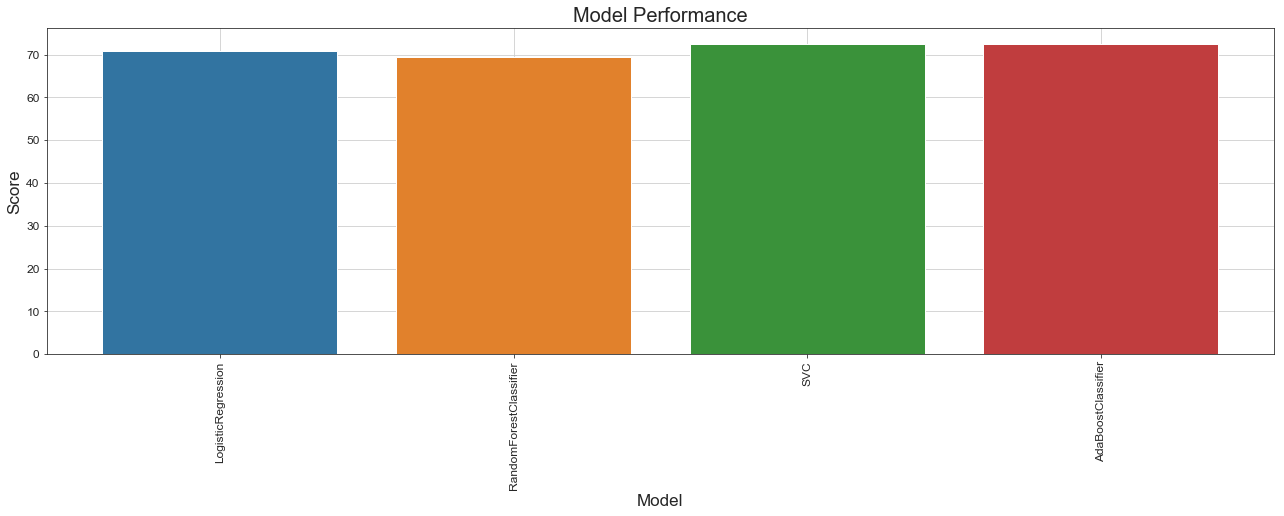

                    model      score
0      LogisticRegression  70.892805
1  RandomForestClassifier  69.378095
2                     SVC  72.509467
3      AdaBoostClassifier  72.567725


In [18]:
plot_model_performace(result)


csv


In [19]:
#Drop id ##################
store = Cardio_raw

In [28]:
#r = store.drop(labels=['id'], axis=1)
r = store[:,1:]


In [31]:
df_dropd =pd.DataFrame(data = r, columns= ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio'])
#display (df_dropd.describe().T)
df_dropd.head() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


In [32]:

#df =pd.DataFrame(data = Cardio_raw, columns= ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio'])
display (df_dropd.describe().T)
#df.head()           

,count,mean,std,min,25%,50%,75%,max
age,68658.0,19464.095866,2468.196792,10798.0,17657.0,19700.0,21324.0,23713.0
gender,68658.0,1.348597,0.476530,1.0,1.0,1.0,2.0,2.0
height,68658.0,164.395933,7.984337,100.0,159.0,165.0,170.0,250.0
weight,68658.0,74.116649,14.299100,30.0,65.0,72.0,82.0,200.0
ap_hi,68658.0,126.559075,16.550980,80.0,120.0,120.0,140.0,200.0
ap_lo,68658.0,81.355996,9.567958,45.0,80.0,80.0,90.0,180.0
cholesterol,68658.0,1.364531,0.678901,1.0,1.0,1.0,1.0,3.0
gluc,68658.0,1.225888,0.571901,1.0,1.0,1.0,1.0,3.0
smoke,68658.0,0.087972,0.283257,0.0,0.0,0.0,0.0,1.0
alco,68658.0,0.053570,0.225169,0.0,0.0,0.0,0.0,1.0


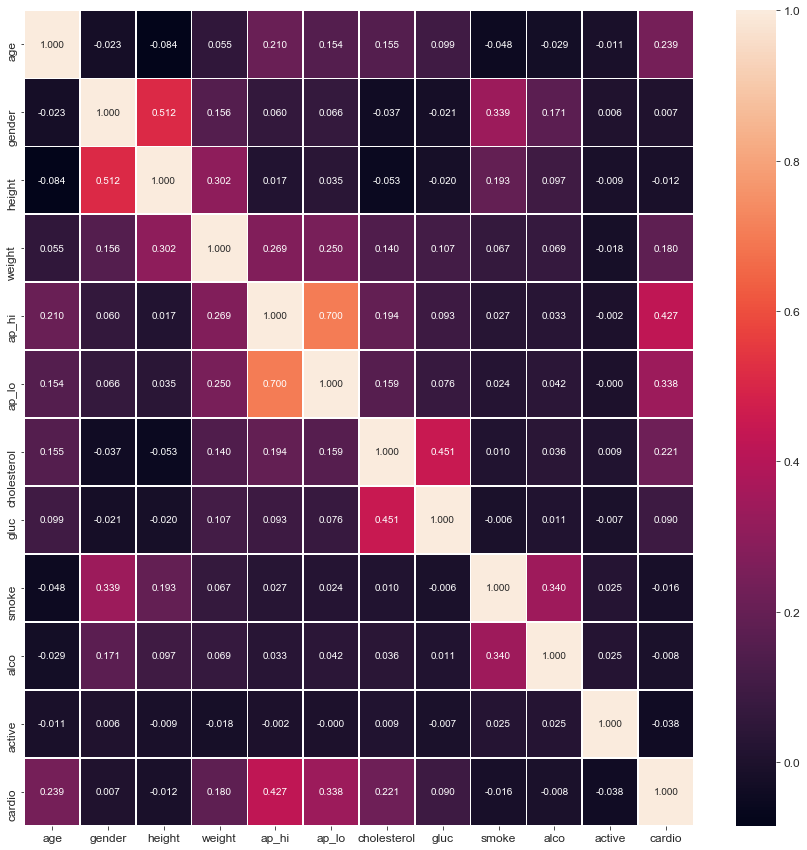

In [34]:
corr =df_dropd.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

Four features: *systolic blood pressure ('ap_hi'), diastolic blood pressure ('ap_lo'), 'Age' and Cholesterol level ('cholesterol')*; show some more correlation with cardiovascular disease (cardio) than the others.

In [26]:
# LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(1,30,2)} # (3,5,6 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))
log_reg_cv

Tuned hyperparameter n_estimators: {'C': 11, 'penalty': 'l1'}
Best score: 0.7261770381968466


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#SVM - Takes too long to run

SVC_improve = svm.SVC() #max_iterint =-1 ,  -1 mean no limit.


grid = { 'kernel':['linear','rbf','poly'],
        'decision_function_shape':['ovo', 'ovr'],
    'C': np.arange(1,10,2)
    } # (1,3,5 ... 30)
         #"C" : np.arange(1,30,2)} 
SVC_improve_cv = GridSearchCV(SVC_improve, grid, cv=3)
SVC_improve_cv.fit(x_train, y_train)
y_pred = SVC_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(SVC_improve_cv.best_params_)) 
print("Best score: {}".format(SVC_improve_cv.best_score_))
print("test score: {}".format(score))


In [35]:
#AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None

#AdaBoostClassifier

AdaBoost_improve = AdaBoostClassifier( random_state=10)
grid = { 'n_estimators': np.arange(10,100,10),
         'learning_rate': np.arange(1,3,1),
        'algorithm':['SAMME', 'SAMME.R']
        }

AdaBoost_improve_cv = GridSearchCV(AdaBoost_improve, grid, cv=3)
AdaBoost_improve_cv.fit(x_train, y_train)
y_pred = AdaBoost_improve_cv.predict(x_test)
score = accuracy_score(y_test,y_pred )

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(AdaBoost_improve_cv.best_params_)) 
print("Best score: {}".format(AdaBoost_improve_cv.best_score_))
print("test score: {}".format(score))


Tuned hyperparameter n_estimators: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 90}
Best score: 0.7294541241440925
test score: 0.7260413632391495


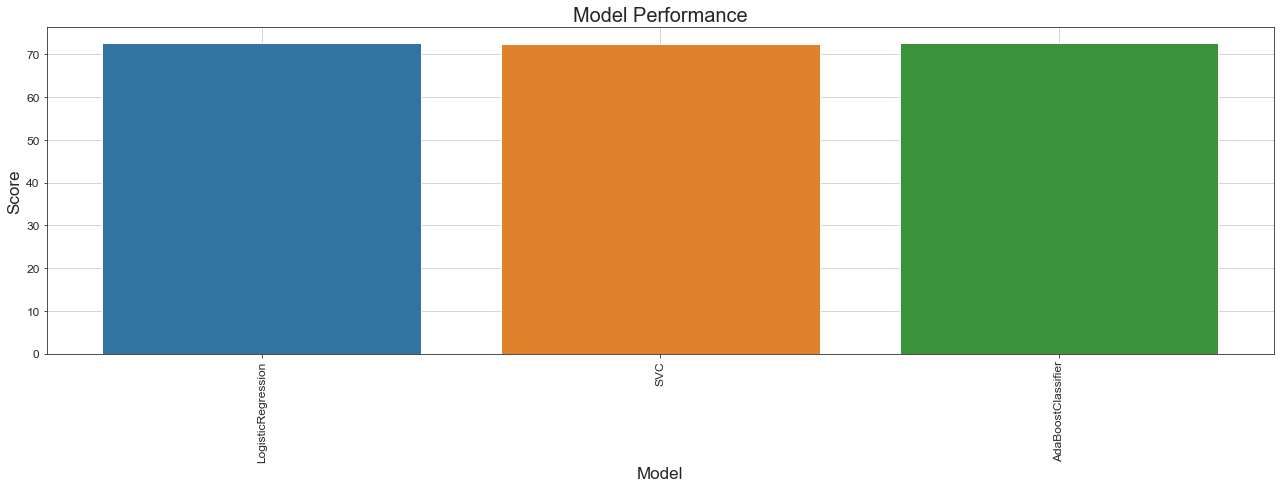

                model      score
0  LogisticRegression  72.662394
1                 SVC  72.509467
2  AdaBoostClassifier  72.604136


In [58]:
models = {
    "LogisticRegression": LogisticRegression( solver="liblinear",C=7, penalty= 'l1',random_state=10),
    "SVC": svm.SVC(kernel="linear",random_state=10),
    "AdaBoostClassifier": AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 90,random_state=10)
    
}

prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train,y_train)
    prediction[model_name] = model.predict(x_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score

result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

plot_model_performace(result)


**Features of importance** are systolic blood pressure ('ap_hi'), diastolic blood pressure ('ap_lo'), 'Age' and Cholesterol level ('cholesterol'); and these features are also the ones that show some more correlation with cardiovascular disease (cardio) than the others

In [35]:
Final_x_train = x_train[:, [4,6,0,5]]# Age, ap_hi, ap_lo, cholesterol
Final_x_test = x_test [:, [4,6,0,5]]
Final_x_train.shape

(54926, 4)

**Combining SVC, Logistic regression and AdaBoost**

In [41]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

In [47]:

linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights=[2,1]).fit(Final_x_train,y_train)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(Final_x_test,y_test))

The accuracy for Linear SVM and Logistic Regression is: 0.7140984561607923


In [51]:

linear_svc=svm.SVC(kernel="linear",random_state=10, probability=True)
lr=LogisticRegression(solver="liblinear",C=7, penalty= 'l1',random_state=10)
ada=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 90,random_state=10)

ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr), ('Adaboost', ada)], 
                       voting='soft', weights=[2,1,1]).fit(Final_x_train,y_train)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(Final_x_test,y_test))

The accuracy for Linear SVM and Logistic Regression is: 0.7140984561607923


In [53]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(solver="liblinear",C=7, penalty= 'l1',random_state=10)
ada=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 90,random_state=10)

ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr), ('Adaboost', ada)], 
                       voting='soft', weights=[2,1,1]).fit(Final_x_train,y_train)
print('The accuracy for combined Linear SVM, Logistic Regression and Adaboost is:',ensemble_lin_lr.score(Final_x_test,y_test))

The accuracy for combined Linear SVM, Logistic Regression and Adaboost is: 0.7141712787649286


**Combining best performing models gave an accuracy of 71%**